In [2]:
import numpy as np # import numpy package as use the alias np
import pandas as pd # import  pandas package as use the alias pd
import matplotlib.pyplot as plt # import pyplot from matplotlib package as use the alias plt
# plot all graphs and images in the notebook
%matplotlib inline 

In [8]:
# Before we create a dashboard for our data, let's take another look
data_file='./hr_data.csv' # store path of data file in variable `data_file`
# import data from file into python pandas.DataFrame and store in variable `data`
data = pd.read_csv(data_file) 
data.head(10) # view first 10 records from data frame 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
# import flask, this will help us to run a web app
from flask import Flask

In [15]:
# This will assist us in generating a simple web dashboard using python
# NB. currently using gleam 0.1.3 available at https://github.com/gggordon/gleam
# Install using
# pip install https://github.com/gggordon/gleam/archive/0.1.3.zip
# import Page and panels from gleam
from gleam import Page, panels

In [52]:
#importing packages to assist with creating web components in python
from wtforms import fields

Our aim is to to generate a dashboard that will allow persons to choose the data that they would like to view and the type of chart to be used. The dashboard will also allow persons to specify the title.

In [53]:
# We will begin by creating a Dashboard Input class that will contain all our options/inputs
# to be specified
class DashboardInput(panels.InputPanel):
    
    # We will create a StringField/Text box to allow users to specifiy the title
    txtbox_title = fields.StringField(label="Chart Title:")
    
    # We will create a dropdown list to allow the user to specify the field they would 
    # like to inlcude
    ddl_data_column = fields.SelectField(label="Data to be displayed:",
                              # Choices contains a list of tuples (field_name, name displayed)
                              choices=[("sales","Department"),
                                       ("Work_accident","Had Accident at Work"),
                                       ("number_project", "Number of Projects"),
                                       ("average_montly_hours", "Average Monthly Hours")])
    
    # We will create a dropdown list to allow the user to specify the field they would 
    # like to inlcude
    ddl_chart_type = fields.SelectField(label="Chart Type:",
                              # Choices contains a list of tuples (field_name, name displayed)
                              choices=[("pie","Pie Chart"),
                                       ("bar","Bar Chart"),
                                       ("barh", "Horizontal Bar Chart")])
    
    # For more field types and more options/paramters
    # Visit https://wtforms.readthedocs.io/en/latest/fields.html
    

In [54]:
# We will create a class to configure how our dashboard is plotted
class DashboardPlot(panels.PlotPanel):

    # Each time the user changes a value or chooses an option our dashboard,
    # The following python method will be called
    # This gives an opportunity to update our plot based on the options
    # specified by the user.
    # The function ends by returning the generated plot
    # This updates the plot/chart that the user sees
    def plot(self, inputs):
        
        # NB. We already imported the data and stored it in the variable data
        # We will extract the column from the data set based on the selected value
        #  stored inside   `inputs.ddl_data_column`
        # We will then count the unique values in the column
        data_to_plot = data[inputs.ddl_data_column].value_counts()
        
        # we will now plot the graph based on the type of plot specified
        
        # We will also check if the user specified a pie chart, if so, we will 
        # add the percentage to using the autopct parameter
        
        if inputs.ddl_chart_type == 'pie':
            fig = data_to_plot.plot.pie(title=inputs.txtbox_title,autopct="%.2f %%")
        else:
            fig = data_to_plot.plot(kind=inputs.ddl_chart_type, title=inputs.txtbox_title)
        
        # We must return the plot when complete
        return fig

In [55]:
# We will create another class, that will group our inputs and outputs for our dashboard
# This class will also enable us to run our web dashboard as an application
class MyDashboard(Page):
    input = DashboardInput()
    output = DashboardPlot()

 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Oct/2017 19:13:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2017 19:13:06] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2017 19:13:12] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2017 19:13:15] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2017 19:13:17] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2017 19:14:04] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2017 19:14:41] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2017 19:14:49] "POST / HTTP/1.1" 200 -


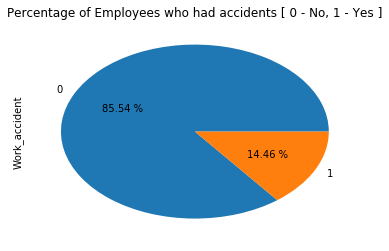

In [56]:
# We will run our app using the following code on port 9000

MyDashboard.run(port=9000)